1. Genetic Algorithm Lab: Solving the Maximum Ones Problem
We'll use a simple genetic algorithm to maximize the number of "1"s in a binary string.

In [25]:
# 1. Genetic Algorithm Lab: Solving the Maximum Ones Problem
# We'll use a simple genetic algorithm to maximize the number of "1"s in a binary string.

# Step 1: Imports and Parameters
import numpy as np
import random


In [34]:
# Step 2: GA Functions
def create_individual(length):
    # Random binary individual
    return np.random.randint(2, size=length)

def fitness(individual):
    # Objective: maximize number of 1s
    return sum(individual)

def mutate(individual, mutation_rate=0.01):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2


In [39]:
def genetic_algorithm(population_size=10, chromosome_length=8, generations=20, mutation_rate=0.01):
    print("hellow")
    population = [create_individual(chromosome_length) for _ in range(population_size)]

    for g in range(generations):
        scored = sorted(
            [(fitness(ind), ind) for ind in population],
            key=lambda pair: pair[0],
            reverse=True
        )
        print(f"Gen {g} | Best: {scored[0][0]} | Avg: {np.mean([f for f,_ in scored])}")

        next_gen = [scored[0][1], scored[1][1]]  # Elite selection

        while len(next_gen) < population_size:
            parents = random.sample(scored[:5], 2)
            c1, c2 = crossover(parents[0][1], parents[1][1])
            next_gen.append(mutate(c1.copy(), mutation_rate))
            if len(next_gen) < population_size:
                next_gen.append(mutate(c2.copy(), mutation_rate))

        population = next_gen

    print("Best individual:", scored[0][1], "with fitness:", scored[0][0])
genetic_algorithm()

hellow
Gen 0 | Best: 7 | Avg: 3.7
Gen 1 | Best: 7 | Avg: 5.4
Gen 2 | Best: 7 | Avg: 6.3
Gen 3 | Best: 7 | Avg: 6.8
Gen 4 | Best: 7 | Avg: 7.0
Gen 5 | Best: 7 | Avg: 6.9
Gen 6 | Best: 7 | Avg: 7.0
Gen 7 | Best: 7 | Avg: 6.9
Gen 8 | Best: 7 | Avg: 7.0
Gen 9 | Best: 7 | Avg: 6.9
Gen 10 | Best: 7 | Avg: 7.0
Gen 11 | Best: 7 | Avg: 7.0
Gen 12 | Best: 7 | Avg: 7.0
Gen 13 | Best: 7 | Avg: 6.9
Gen 14 | Best: 7 | Avg: 6.9
Gen 15 | Best: 7 | Avg: 6.9
Gen 16 | Best: 7 | Avg: 7.0
Gen 17 | Best: 7 | Avg: 7.0
Gen 18 | Best: 7 | Avg: 6.9
Gen 19 | Best: 8 | Avg: 7.1
Best individual: [1 1 1 1 1 1 1 1] with fitness: 8


## Extension:
- Try increasing chromosome_length or population_size.

- Modify the fitness function to solve other problems (e.g., string matching).

In [28]:
# 2. Artificial Neural Network Lab: Iris Dataset Classification
# We'll use TensorFlow/Keras to build and train a simple neural network to classify iris species based on flower measurements.

# Step 1: Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras


In [29]:
# Step 2: Data Preparation
# Load data and prepare splits
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [30]:
# Step 3: Build and Train the Neural Network
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.3731 - loss: 1.1535 - val_accuracy: 0.3158 - val_loss: 1.1490
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3871 - loss: 1.1298 - val_accuracy: 0.3158 - val_loss: 1.1385
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3673 - loss: 1.1417 - val_accuracy: 0.3158 - val_loss: 1.1291
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4135 - loss: 1.1303 - val_accuracy: 0.3158 - val_loss: 1.1201
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3583 - loss: 1.1273 - val_accuracy: 0.3158 - val_loss: 1.1120
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3942 - loss: 1.1159 - val_accuracy: 0.3158 - val_loss: 1.1043
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3911 - loss: 1.0953 - val_accuracy: 0.3158 - val_loss: 1.0966
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3863 - loss: 1.1077 - val_accuracy: 0.3158 - val_loss: 1.0892
Epoch 9/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8810 - loss: 0.7577

Test accuracy: 0.8684210777282715


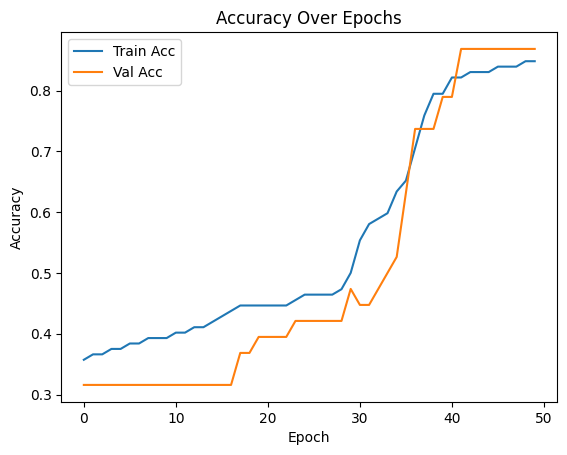

In [31]:
# Step 4: Evaluate and Visualize Results
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

### Extension and Discussion:
- Experiment with more or fewer layers/neurons, different activation functions.

- Visualize the loss curve: plt.plot(history.history['loss'])

- Try predicting the species of a new iris measurement by:
  ```python
  example = scaler.transform([[5.1, 3.5, 1.4, 0.2]])
print(model.predict(example))
```